# Ball Recognizer
The goal of this project is to classify 20 different types of sports balls / game balls commonly played around the world. The types are following: <br/>
1. Soccer Ball
2. Cricket Ball
3. Basketball Ball
4. Field Hockey Ball
5. Volleyball 
6. Tennis Ball
7. Rugby Ball
8. Baseball
9. Table Tennis Ball (Ping Pong)
10. American Football 
11. Golf Ball
12. Handball
13. Pool Ball
14. Water Polo Ball
15. Softball
16. Bocce Ball
17. Bowling Ball
18. Squash Ball
19. Lacrosse Ball
20. Wiffleball

# Setting Up Necessary Things

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32 # batch size
version = 5

In [ ]:
!pip install -Uqq fastai

In [ ]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Work Station/Ball Recognizer

/content/drive/My Drive/Work Station/Ball Recognizer


# Fetch Data

In [ ]:
data_path = "data"
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path, bs = bs)
torch.save(dls, f"dataloaders/ball_dataloader_v{version}.pkl")

In [ ]:
dls = torch.load(f"dataloaders/ball_dataloader_v{version}.pkl")

RuntimeError: ignored

In [ ]:
dls = torch.load(f"dataloaders/ball_dataloader_v{version}.pkl", map_location=torch.device('cpu'))

In [ ]:
dls.train.vocab

['american football ball', 'baseball ball', 'basketball ball', 'bocce ball', 'bowling ball', 'cricket ball', 'field hockey ball', 'golf ball', 'handball ball', 'lacrosse ball', 'pool ball', 'rugby ball', 'soccer ball', 'softball ball', 'squash ball', 'table tennis ball', 'tennis ball', 'volleyball ball', 'water polo ball', 'wiffleball ball']

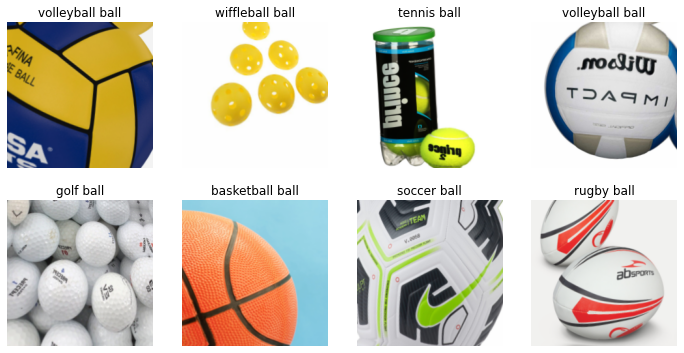

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

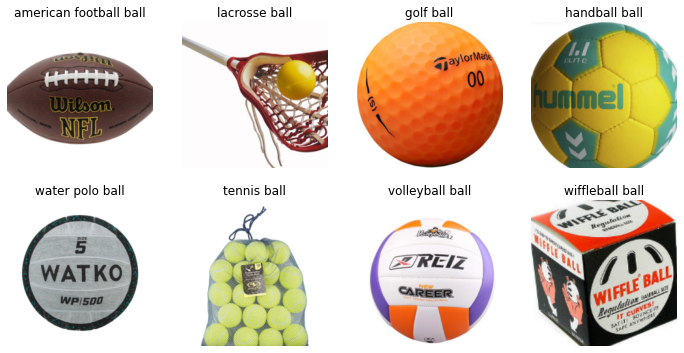

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

# Training and Data Cleaning

In [ ]:
model_path = "models"

In [ ]:
model = vision_learner(dls, resnet34, metrics=[error_rate,accuracy])

In [ ]:
#timm: https://appsilon.com/timm-with-fastai/

In [ ]:
# model.load(f"ball-recognizer-v{version}")

In [ ]:
model.fine_tune(5)

In [ ]:
# model.fine_tune(1)

In [ ]:
model.save(f"ball-recognizer-v{version}")

Path('models/ball-recognizer-v5.pth')

In [ ]:
# model.load(f"ball-recognizer-v{version}")

In [ ]:
interp = ClassificationInterpretation.from_learner(model)


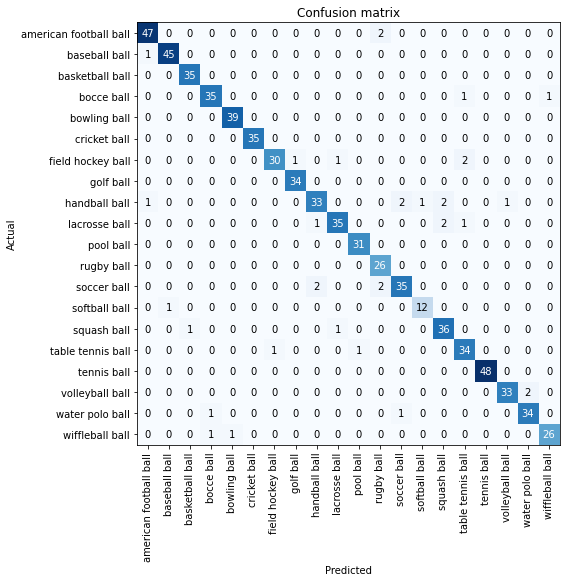

In [ ]:
interp.plot_confusion_matrix(figsize=(8, 8)) #American Football, baseball, 

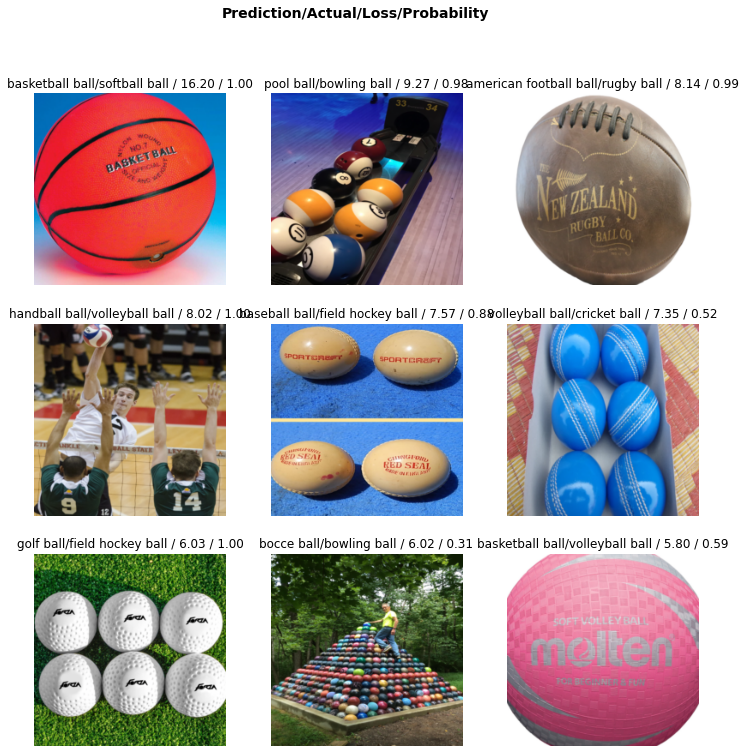

In [ ]:
interp.plot_top_losses(9, nrows=3,figsize=(16, 12))

In [ ]:
cleaner = ImageClassifierCleaner(model)
cleaner 

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()                                    # delete irrelevant data
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}") # change the directory

# Export model for inference

In [ ]:
model.export(f"{model_path}/ball-recognizer-v{version}.pkl")